<a href="https://colab.research.google.com/github/jdiazram/lecturasIIC3633-2021/blob/main/practicos/Reinforcement_Learning_Mabwiser_JDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico Mabwiser

Adaptado de los tutoriales disponibles en: https://github.com/fidelity/mabwiser/tree/master/examples

## Reinforcement Learning

Un agente de RL busca tomar acciones que logren maximizar la ganancia acumulativa.

![RL setup](https://github.com/bamine/recsys-summer-school/raw/12e57cc4fd1cb26164d2beebf3ca29ebe2eab960/notebooks/images/rl-setup.png)


## Exploration vs. Exploitation

Se busca encontrar un balance entre la exploration (decidir tomar una acción para ganar conocimiento) y exploitation (decidir la acción que se calcula que tendrá la mejor ganancia).

![texto alternativo](https://miro.medium.com/max/1400/1*_5dltx4BcI8rRmCK2Sq_kw.png)

## Importar paquetes necesarios

In [1]:
!pip install mabwiser
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.preprocessing import StandardScaler

from mabwiser.mab import MAB, LearningPolicy, NeighborhoodPolicy

import random
from mabwiser.simulator import Simulator

from time import time

     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████████| 23.2 MB 43.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Problema con contexto:

Una plataforma de comercio virtual cuenta con 5 _ads_ y quiere determinar cuál de estos generará mayor _revenue_ para un usuario en específico. Para esto, se cuenta con información histórica de _revenues_ obtenidos por otros usuarios en distintos _ads_ junto con la información de la edad, la razón de clicks y si cada usuario es subscriptor o no.

In [2]:
# Arms
ads = [1, 2, 3, 4, 5]

# Historical data of ad decisions with corresponding revenues and context information
train_df = pd.DataFrame({'ad': [1, 1, 1, 2, 4, 5, 3, 3, 2, 1, 4, 5, 3, 2, 5],
                         'revenues': [10, 17, 22, 9, 4, 20, 7, 8, 20, 9, 50, 5, 7, 12, 10],
                         'age': [22, 27, 39, 48, 21, 20, 19, 37, 52, 26, 18, 42, 55, 57, 38],
                         'click_rate': [0.2, 0.6, 0.99, 0.68, 0.15, 0.23, 0.75, 0.17,
                                        0.33, 0.65, 0.56, 0.22, 0.19, 0.11, 0.83],
                         'subscriber': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]}
                        )

# Test data to for new prediction
test_df = pd.DataFrame({'age': [37, 52], 'click_rate': [0.5, 0.6], 'subscriber': [0, 1]})
test_df_revenue = pd.Series([7, 13])

# Scale the training and test data
scaler = StandardScaler()
train = scaler.fit_transform(train_df[['age', 'click_rate', 'subscriber']].values.astype('float64'))
test = scaler.transform(test_df.values.astype('float64'))

In [3]:
########################################################
# KNearest Neighborhood Policy with UCB1 Learning Policy
########################################################

# KNearest context policy with k equals to 5 and ucb1 learning with alpha of 1.25
knearest = MAB(arms=ads,
               learning_policy=LearningPolicy.UCB1(alpha=1.25),
               neighborhood_policy=NeighborhoodPolicy.KNearest(k=5))

# Learn from previous ads shown and revenues generated
knearest.fit(decisions=train_df['ad'], rewards=train_df['revenues'], contexts=train)

# Predict the next best ad to show
prediction = knearest.predict(test)

# Expectation of each ad based on learning from past ad revenues
expectations = knearest.predict_expectations(test)

# Results
print("KNearest: ", prediction, " ", expectations)
assert(prediction == [5, 1])

# Online update of model
knearest.partial_fit(decisions=prediction, rewards=test_df_revenue, contexts=test)

# Updating of the model with new arm
knearest.add_arm(6)

KNearest:  [5, 1]   [{1: 14.5857953014744, 2: 11.242653222492628, 3: 0, 4: 0, 5: 16.5857953014744}, {1: 24.242653222492628, 2: 17.5857953014744, 3: 10.242653222492628, 4: 0, 5: 7.242653222492627}]


### Actividad 1: 
Suponga que a este mismo usuario, se le presenta el nuevo _ad_, $6$, obteniendo un revenue de $40$. Usando el método _partial\_fit_ simule este caso e imprima las nuevas expectations. Comente los resultados obtenidos.

In [4]:
#se creó ads2 con 6 brazos y se agregó para el entrenamiento ejemplos con ad=6 y revenues=40 para entrenamiento

# Arms
ads2 = [1, 2, 3, 4, 5, 6]

#Historical data of ad decisions with corresponding revenues and context information
train_df2 = pd.DataFrame({'ad': [1, 1, 1, 2, 4, 5, 3, 3, 2, 1, 4, 5, 3, 2, 5, 6],
                         'revenues': [10, 17, 22, 9, 4, 20, 7, 8, 20, 9, 50, 5, 7, 12, 10, 40],
                         'age': [22, 27, 39, 48, 21, 20, 19, 37, 52, 26, 18, 42, 55, 57, 38, 23],
                         'click_rate': [0.2, 0.6, 0.99, 0.68, 0.15, 0.23, 0.75, 0.17,
                                        0.33, 0.65, 0.56, 0.22, 0.19, 0.11, 0.83, 0.54],
                         'subscriber': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]}
                        )

#NO SE USA
# Test data to for new prediction
#test_df2 = pd.DataFrame({'age': [37, 52], 'click_rate': [0.5, 0.6], 'subscriber': [0, 1]})
#test_df_revenue2 = pd.Series([7, 13])

# Scale the training and test data
scaler2 = StandardScaler()
train2 = scaler2.fit_transform(train_df2[['age', 'click_rate', 'subscriber']].values.astype('float64'))
#test2 = scaler2.transform(test_df2.values.astype('float64'))

########################################################
# KNearest Neighborhood Policy with UCB1 Learning Policy
########################################################

# se aumenta a k=6
# KNearest context policy with k equals to 6 and ucb1 learning with alpha of 1.25
knearest2 = MAB(arms=ads2,
               learning_policy=LearningPolicy.UCB1(alpha=1.25),
               neighborhood_policy=NeighborhoodPolicy.KNearest(k=6))

# Learn from previous ads shown and revenues generated
knearest2.fit(decisions=train_df2['ad'], rewards=train_df2['revenues'], contexts=train2)

# Predict the next best ad to show
prediction2 = knearest2.predict(test)

# Expectation of each ad based on learning from past ad revenues
expectations2 = knearest2.predict_expectations(test)

# Results
print("KNearest: ", prediction2, " ", expectations2)
#assert(prediction == [5, 1])

# Online update of model
knearest2.partial_fit(decisions=prediction, rewards=test_df_revenue, contexts=test)

# Updating of the model with new arm
#knearest2.add_arm(6)

KNearest:  [5, 6]   [{1: 14.673207748807313, 2: 11.366273091031056, 3: 9.366273091031056, 4: 0, 5: 16.673207748807314, 6: 0}, {1: 24.366273091031058, 2: 17.673207748807314, 3: 10.366273091031056, 4: 0, 5: 7.366273091031056, 6: 42.366273091031054}]


RESPUESTA: se observa que las expectations son distintas, ahora es el 5 igual a 16.67 y 6 igual a 42.36. Esto creo bajo el contexto de aumentar los brazos.

## Problema sin contexto:

El sitio ahora quiere elegir entre dos posibles opciones de diseño para su _homepage_. Para esto tiene datos históricos del revenue aportado por cada diseño, pero no cuenta con ningún dato acerca de los usuarios.

In [5]:
# Arms
options = [1, 2]

# Historical data of layouts decisions and corresponding rewards
layouts = [1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1]
revenues = [10, 17, 22, 9, 4, 0, 7, 8, 20, 9, 50, 5, 7, 12, 10]

In [6]:
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
greedy = MAB(arms=options,
             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
             seed=123456)

# Learn from previous layouts decisions and revenues generated
greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts = [1, 2, 1, 2]
additional_revenues = [0, 12, 7, 19]

# Online updating of the model
greedy.partial_fit(additional_layouts, additional_revenues)

Epsilon Greedy:  1   {1: 10.875, 2: 14.714285714285714}


### Actividad 2:
Suponga que en un experimento online, se le muestra a un usuario ambos diseños y el _revenue_ obtenido es exactamente el estimado por el agente. ¿Qué esperaría que pase al actualizar el modelo? Simule este caso en $5$ iteraciones, imprimiendo las expectations. Comente los resultados observados.

In [7]:
#iteracion 1
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
#greedy = MAB(arms=options,
#             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
#             seed=123456)

# Learn from previous layouts decisions and revenues generated
#greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts1 = [1, 2]
additional_revenues1 = [10.875, 14.714285714285714]

# Online updating of the model
greedy.partial_fit(additional_layouts1, additional_revenues1)

Epsilon Greedy:  2   {1: 9.4, 2: 14.88888888888889}


In [8]:
#iteracion 2
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
#greedy = MAB(arms=options,
#             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
#             seed=123456)

# Learn from previous layouts decisions and revenues generated
#greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts2 = [1, 2]
additional_revenues2 = [9.4, 14.88888888888889]

# Online updating of the model
greedy.partial_fit(additional_layouts2, additional_revenues2)

Epsilon Greedy:  2   {1: 9.534090909090908, 2: 14.871428571428572}


In [9]:
#iteracion 3
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
#greedy = MAB(arms=options,
#             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
#             seed=123456)

# Learn from previous layouts decisions and revenues generated
#greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts3 = [1, 2]
additional_revenues3 = [9.534090909090908, 14.871428571428572]

# Online updating of the model
greedy.partial_fit(additional_layouts3, additional_revenues3)

Epsilon Greedy:  2   {1: 9.522916666666667, 2: 14.873015873015873}


In [10]:
#iteracion 4
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
#greedy = MAB(arms=options,
#             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
#             seed=123456)

# Learn from previous layouts decisions and revenues generated
#greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts4 = [1, 2]
additional_revenues4 = [9.522916666666667, 14.873015873015873]

# Online updating of the model
greedy.partial_fit(additional_layouts4, additional_revenues4)

Epsilon Greedy:  2   {1: 9.523776223776224, 2: 14.872883597883598}


In [11]:
#iteracion 5
###################################
# Epsilon Greedy Learning Policy
###################################

# Epsilon Greedy learning policy with random exploration set to 15%
#greedy = MAB(arms=options,
#             learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.15),
#             seed=123456)

# Learn from previous layouts decisions and revenues generated
#greedy.fit(decisions=layouts, rewards=revenues)

# Predict the next best layouts decision
prediction = greedy.predict()

# Expected revenues of each layouts learnt from historical data based on epsilon greedy policy
expectations = greedy.predict_expectations()

# Results
print("Epsilon Greedy: ", prediction, " ", expectations)
# assert(prediction == 1)

# Additional historical data becomes available which allows _online learning
additional_layouts5 = [1, 2]
additional_revenues5 = [9.523776223776224, 14.872883597883598]

# Online updating of the model
greedy.partial_fit(additional_layouts, additional_revenues)

Epsilon Greedy:  2   {1: 9.523714826839827, 2: 14.872893772893773}


In [21]:
import plotly.express as px
import matplotlib.pyplot as plt 
import numpy as np

Text(0, 0.5, 'Valores')

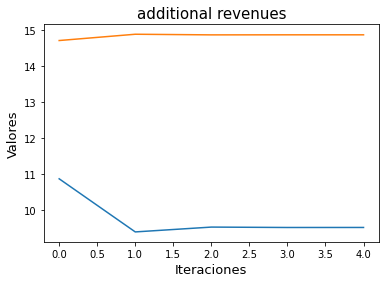

In [27]:
x=np.arange(5)
y1 = [additional_revenues1[0],additional_revenues2[0],additional_revenues3[0],additional_revenues4[0],additional_revenues5[0]]
y2 = [additional_revenues1[1],additional_revenues2[1],additional_revenues3[1],additional_revenues4[1],additional_revenues5[1]]

plt.plot(x,y1)
plt.plot(x,y2)
plt.title("additional revenues",fontsize=15)
plt.xlabel("Iteraciones",fontsize=13)
plt.ylabel("Valores",fontsize=13)

COMENTAR RESULTADOS: Se observa un decaimiento en el primer revenue que desde la 2da iteraciones se mantiene casi constante, pero el 2do revenue se mantuvo casi constante desde la 1era iteración. Por lo anterior no realiza grandes cambios la politica de Epsilon Greedy Learning.

* Learning policies:
 * Epsilon Greedy
 * LinTS
 * LinUCB
 * Popularity
 * Random
 * Softmax
 * Thompson Sampling (TS)
 * Upper Confidence Bound (UCB1)

* Neighborhood Policies
 * Clusters
 * K-Nearest
 * LSH Nearest
 * Radius
 * TreeBandit

## Simulación:

Vamos a simular un multi-armed bandits para un dataset aleatorio con $1000$ entradas de datos y comparar los rendimientos de cada learning-policy:

In [28]:
size = 1000

decisions = [random.randint(0, 2) for _ in range(size)]
rewards = [random.randint(0, 1000) for _ in range(size)]
contexts = [[random.random() for _ in range(50)] for _ in range(size)]

In [29]:
####################################
# Different Bandits for Simulation
####################################

print('Starting simulation 1\n')


def binarize(decision, reward):

    return reward >= 500

n_jobs=2
contextual_mabs = [('Random', MAB([0, 1], LearningPolicy.Random(), NeighborhoodPolicy.Radius(10), n_jobs=n_jobs)),
                   ('UCB1', MAB([0, 1], LearningPolicy.UCB1(1), NeighborhoodPolicy.Radius(10), n_jobs=n_jobs)),
                   ('ThompsonSampling', MAB([0, 1], LearningPolicy.ThompsonSampling(binarize),
                                            NeighborhoodPolicy.Radius(10), n_jobs=n_jobs)),
                   ('EpsilonGreedy', MAB([0, 1], LearningPolicy.EpsilonGreedy(epsilon=.15),
                                         NeighborhoodPolicy.Radius(10), n_jobs=n_jobs)),
                   ('Softmax', MAB([0, 1], LearningPolicy.Softmax(), NeighborhoodPolicy.Radius(10), n_jobs=n_jobs))]

context_free_mabs = [('Random', MAB([0, 1], LearningPolicy.Random(), n_jobs=n_jobs)),
                     ('UCB1', MAB([0, 1], LearningPolicy.UCB1(1), n_jobs=n_jobs)),
                     ('ThompsonSampling', MAB([0, 1], LearningPolicy.ThompsonSampling(binarize), n_jobs=n_jobs)),
                     ('EpsilonGreedy', MAB([0, 1], LearningPolicy.EpsilonGreedy(epsilon=.15), n_jobs=n_jobs)),
                     ('Softmax', MAB([0, 1], LearningPolicy.Softmax(), n_jobs=n_jobs))]

Starting simulation 1



2021-10-26 19:43:47,056 INFO Simulation Parameters
2021-10-26 19:43:47,057 INFO 	 bandits: [('Random', <mabwiser.mab.MAB object at 0x7f70872af710>), ('UCB1', <mabwiser.mab.MAB object at 0x7f708731f910>), ('ThompsonSampling', <mabwiser.mab.MAB object at 0x7f70872af3d0>), ('EpsilonGreedy', <mabwiser.mab.MAB object at 0x7f70872af7d0>), ('Softmax', <mabwiser.mab.MAB object at 0x7f70872afb50>)]
2021-10-26 19:43:47,060 INFO 	 scaler: None
2021-10-26 19:43:47,062 INFO 	 test_size: 0.5
2021-10-26 19:43:47,065 INFO 	 is_ordered: False
2021-10-26 19:43:47,067 INFO 	 batch_size: 0
2021-10-26 19:43:47,070 INFO 	 evaluator: <function default_evaluator at 0x7f7093242f80>
2021-10-26 19:43:47,075 INFO 	 seed: 123456
2021-10-26 19:43:47,077 INFO 	 is_quick: False
2021-10-26 19:43:47,079 INFO 	 log_file: None
2021-10-26 19:43:47,093 INFO 	 format: %(asctime)s %(levelname)s %(message)s
2021-10-26 19:43:47,096 INFO 

2021-10-26 19:43:47,098 INFO Total Stats
2021-10-26 19:43:47,101 INFO {0: {'count': 316, 

Complete 0.01064985990524292 minutes


Random
Worst Case Scenario: {0: {'count': 269, 'sum': 40291, 'min': 0, 'max': 981, 'mean': 149.7806691449814, 'std': 274.5076299173187}, 1: {'count': 231, 'sum': 41703, 'min': 1, 'max': 1000, 'mean': 180.53246753246754, 'std': 303.3667469334659}}
Average Case Scenario: {0: {'count': 269, 'sum': 133234.70440251572, 'min': 0.0, 'max': 981.0, 'mean': 495.2962988941105, 'std': 159.94463653262102}, 1: {'count': 231, 'sum': 118105.98837209301, 'min': 1.0, 'max': 1000.0, 'mean': 511.2813349441256, 'std': 192.24937895711352}}
Best Case Scenario: {0: {'count': 269, 'sum': 226356, 'min': 0, 'max': 997, 'mean': 841.4721189591078, 'std': 284.10054401764774}, 1: {'count': 231, 'sum': 187119, 'min': 1, 'max': 1000, 'mean': 810.038961038961, 'std': 310.9786441168526}}



UCB1
Worst Case Scenario: {0: {'count': 0, 'sum': nan, 'min': nan, 'max': nan, 'mean': nan, 'std': nan}, 1: {'count': 500, 'sum': 88347, 'min': 1, 'max': 1000, 'mean': 176.694, 'std': 302.191185

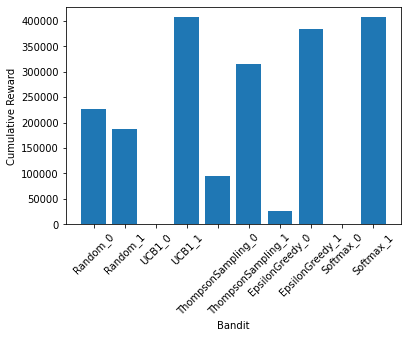

In [30]:
####################################
# Context-Free Simulation
####################################
start = time()
sim = Simulator(context_free_mabs, decisions, rewards, contexts=None,
                scaler=None, test_size=0.5, is_ordered=False, batch_size=0, seed=123456)
sim.run()
end = time()

runtime = (end - start) / 60
print('Complete', str(runtime) + ' minutes')
print('\n')

for mab_name, mab in sim.bandits:
    print(mab_name)

    print('Worst Case Scenario:', sim.bandit_to_arm_to_stats_min[mab_name])
    print('Average Case Scenario:', sim.bandit_to_arm_to_stats_avg[mab_name])
    print('Best Case Scenario:', sim.bandit_to_arm_to_stats_max[mab_name])

    print('\n\n')

sim.plot('max', True) 
# Vamos a plotear el best case scenario para todos los bandidos utilizados. El parámetro True indica que en el plot se va a plotear por separado cada "brazo"

### Actividad 3: Simulación "on-line" con contexto.

Basándose en el código anterior, vamos a repetir este experimento para los bandidos con contexto definidos anteriormente. Recuerde que los datos de contextos deben ser escalados, por lo que debe cambiar el parámetro scaler.

Esta simulación, a diferencia de la anterior, simulará un agente que se va actualizando de manera "on-line", en donde en cada iteración, los agentes reciben $100$ datos y en base a estos, actualizan sus políticas. Para hacer esto, solo debe modificar el parámetro de batch-size. Comente sus resultados

2021-10-26 19:44:15,664 INFO Simulation Parameters
2021-10-26 19:44:15,664 INFO Simulation Parameters
2021-10-26 19:44:15,673 INFO 	 bandits: [('Random', <mabwiser.mab.MAB object at 0x7f708731f950>), ('UCB1', <mabwiser.mab.MAB object at 0x7f708731f990>), ('ThompsonSampling', <mabwiser.mab.MAB object at 0x7f7087440210>), ('EpsilonGreedy', <mabwiser.mab.MAB object at 0x7f7087440e50>), ('Softmax', <mabwiser.mab.MAB object at 0x7f7087440e10>)]
2021-10-26 19:44:15,673 INFO 	 bandits: [('Random', <mabwiser.mab.MAB object at 0x7f708731f950>), ('UCB1', <mabwiser.mab.MAB object at 0x7f708731f990>), ('ThompsonSampling', <mabwiser.mab.MAB object at 0x7f7087440210>), ('EpsilonGreedy', <mabwiser.mab.MAB object at 0x7f7087440e50>), ('Softmax', <mabwiser.mab.MAB object at 0x7f7087440e10>)]
2021-10-26 19:44:15,678 INFO 	 scaler: StandardScaler()
2021-10-26 19:44:15,678 INFO 	 scaler: StandardScaler()
2021-10-26 19:44:15,685 INFO 	 test_size: 0.5
2021-10-26 19:44:15,685 INFO 	 test_size: 0.5
2021-10-26

Complete 0.1820019841194153 minutes


Random
Worst Case Scenario: {0: {'count': 273, 'sum': 46036, 'min': 0, 'max': 981, 'mean': 168.63003663003664, 'std': 290.43716975275623}, 1: {'count': 227, 'sum': 43229, 'min': 1, 'max': 1000, 'mean': 190.43612334801762, 'std': 313.56190027334833}}
Average Case Scenario: {0: {'count': 273, 'sum': 135736.98318676272, 'min': 6.0, 'max': 981.0, 'mean': 497.2050666181785, 'std': 172.37064699351174}, 1: {'count': 227, 'sum': 117459.15196456088, 'min': 2.0, 'max': 1000.0, 'mean': 517.441198081766, 'std': 198.39275543203195}}
Best Case Scenario: {0: {'count': 273, 'sum': 225135, 'min': 6, 'max': 997, 'mean': 824.6703296703297, 'std': 284.13823397444844}, 1: {'count': 227, 'sum': 185302, 'min': 2, 'max': 1000, 'mean': 816.3083700440528, 'std': 307.92241438057084}}



UCB1
Worst Case Scenario: {0: {'count': 76, 'sum': 15839, 'min': 0, 'max': 974, 'mean': 208.4078947368421, 'std': 317.0923067346553}, 1: {'count': 424, 'sum': 75961, 'min': 1, 'max': 1000, 'm

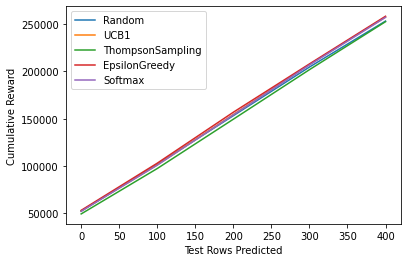

In [31]:
start = time()
sim = Simulator(contextual_mabs, decisions, rewards, contexts,
                scaler=StandardScaler(), test_size=0.5, is_ordered=False, batch_size=100, seed=123456)
sim.run()
end = time()

runtime = (end - start) / 60
print('Complete', str(runtime) + ' minutes')
print('\n')

for mab_name, mab in sim.bandits:
    print(mab_name)

    # Como esta simulación es online, se debe específicar que imprima el valor 'total'
    print('Worst Case Scenario:', sim.bandit_to_arm_to_stats_min[mab_name]['total'])
    print('Average Case Scenario:', sim.bandit_to_arm_to_stats_avg[mab_name]['total'])
    print('Best Case Scenario:', sim.bandit_to_arm_to_stats_max[mab_name]['total'])

    print('\n\n')

sim.plot('avg', False)
# Como buscamos ahora maximizar el revenue, no separaremos los resultados por brazo, sino que se graficará de manera conjunta el revenue promedio obtenido por cada agente.

En términos de tiempo se demora mas en ejecutar, comparado con el experimento anterior. Además, según el gráfico se observa un promedio creciente obtenido por cada agente, entonces para este caso, donde existe un contexto dado, cualquier politica entrega buenos resultados.